# 機器學習理論與實作 練習三

## Cross validation 實作 (實際會採用的方式)

### Load data

In [101]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [144]:
data = datasets.load_iris()

### Format data

In [145]:
iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris["target"] = data["target"]

In [146]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [126]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### K-fold CV (評估模型的分數)

In [62]:
from sklearn.model_selection import KFold, cross_val_score

In [63]:
k_fold = KFold(n_splits=5, shuffle=True)   # n_splits=k值=分5群 , shuffle洗牌

In [64]:
for train_indices, test_indices in k_fold.split(iris["target"]):
    print("Train: {} | test: {}".format(train_indices, test_indices))
# 依照 k_fold.split(iris["target"] 均勻分配在不同群

Train: [  1   3   4   5   6   7   9  10  11  12  13  14  15  17  18  19  21  23
  24  27  28  29  30  32  34  35  37  38  39  40  42  43  44  45  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  68  69  70  71  73  74  75  76  77  78  79  80  82  83  84  86  87  88
  89  92  93  94  95  96  98  99 100 101 102 103 104 105 107 108 109 111
 112 113 114 115 116 118 119 120 121 122 123 124 126 127 128 129 130 131
 132 133 134 135 137 138 139 140 141 142 143 148] | test: [  0   2   8  16  20  22  25  26  31  33  36  41  46  67  72  81  85  90
  91  97 106 110 117 125 136 144 145 146 147 149]
Train: [  0   2   3   4   5   6   7   8  10  12  13  14  15  16  17  18  19  20
  22  23  25  26  27  28  29  30  31  32  33  34  36  37  38  39  41  42
  43  44  46  47  48  51  52  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  75  79  80  81  85  86  87  88  89  90
  91  92  93  96  97  98  99 101 102 103 104 105 106 107 108 109 110 111
 1

### Training model

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(gamma="auto")

### Training model with CV

In [67]:
[svc.fit(iris.iloc[train, 0:3].values, iris.loc[train, "target"].values).score(iris.iloc[test, 0:3].values, iris.loc[test, "target"].values)
 for train, test in k_fold.split(iris["target"])]

# x = iris.iloc[train, 0:3].values , y = iris.loc[train, "target"].values


[1.0, 1.0, 0.9666666666666667, 0.8666666666666667, 1.0]

### 以上為各個模型的準確率

# CV scoring

In [68]:
cross_val_score(svc, iris.iloc[:, 0:3].values, iris["target"].values, cv=k_fold, n_jobs=-1)

array([0.96666667, 1.        , 0.96666667, 0.93333333, 0.9       ])

In [69]:
cross_val_score(svc, iris.iloc[:, 0:3].values, iris["target"].values, cv=k_fold, n_jobs=-1,
                scoring='precision_macro')
# cross_val_score 交叉驗證評估分數
# scoring='precision_macro' 精準度

array([0.97435897, 0.95238095, 1.        , 0.97222222, 0.91666667])

# Let's clustering!

## [clustering](https://scikit-learn.org/stable/modules/clustering.html)

* K-means
* Affinity propagation
* DBSCAN
* Hierarchical clustering (AgglomerativeClustering)

## K-means

## [參考網址](http://members.cbio.mines-paristech.fr/~nvaroquaux/teaching/2016-image-xd/packages/scikit-learn/index.html)

In [158]:
data = datasets.load_iris()
iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris["target"] = data["target"]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [159]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [160]:
print(k_means.labels_[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [161]:
print(k_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [162]:
k_means.labels_[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [165]:
iris['k_means'] = k_means.labels_.tolist()
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,k_means
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


## 創造一個新欄位加入，以新欄位作為顏色區別

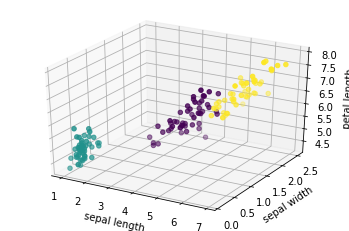

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x, y, z = iris['petal length (cm)'], iris['petal width (cm)'], iris['sepal length (cm)']
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z, c=iris['k_means'])  # 绘制数据点


ax.set_zlabel('petal length')  # 坐标轴
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')
plt.show()

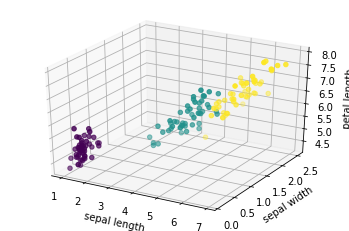

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x, y, z = iris['petal length (cm)'], iris['petal width (cm)'], iris['sepal length (cm)']
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z, c=iris['target'])  # 绘制数据点


ax.set_zlabel('petal length')  # 坐标轴
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')
plt.show()